# import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# helper functions (if needed)

In [3]:
# python code...

# read training data into data frame

In [4]:
train_data = pd.read_csv('train.csv')
print(train_data)

       age         workclass     education  education-num      marital-status  \
0       39         State-gov     Bachelors             13       Never-married   
1       50  Self-emp-not-inc     Bachelors             13  Married-civ-spouse   
2       38           Private       HS-grad              9            Divorced   
3       53           Private          11th              7  Married-civ-spouse   
4       37           Private       Masters             14  Married-civ-spouse   
...    ...               ...           ...            ...                 ...   
26044   43           Private     Assoc-voc             11  Married-civ-spouse   
26045   32           Private       Masters             14       Never-married   
26046   53           Private       Masters             14  Married-civ-spouse   
26047   22           Private  Some-college             10       Never-married   
26048   40           Private       HS-grad              9  Married-civ-spouse   

              occupation   

# analyze and visualize data to find candidate features

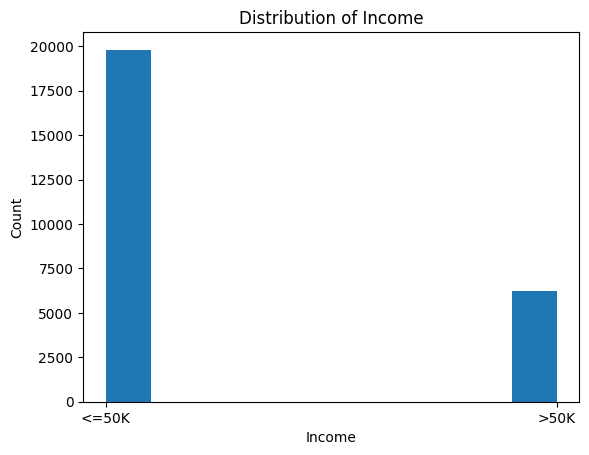

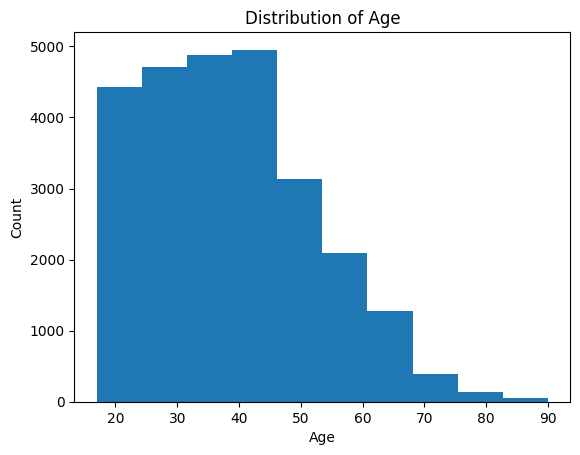

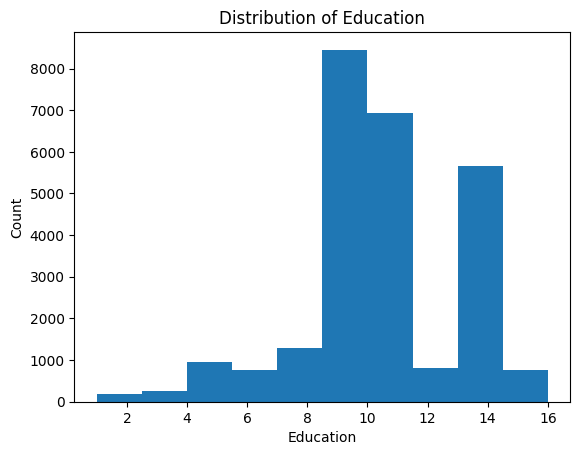

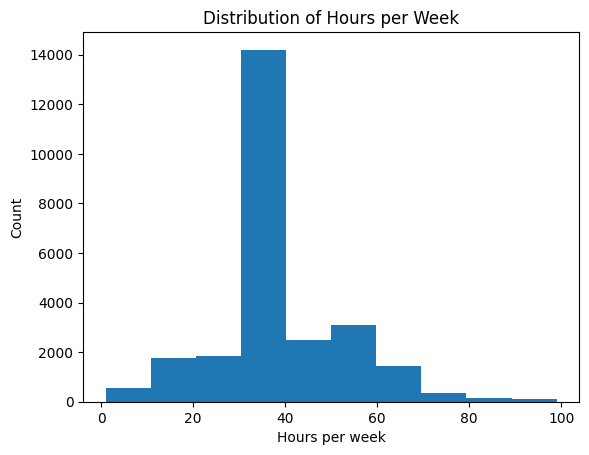

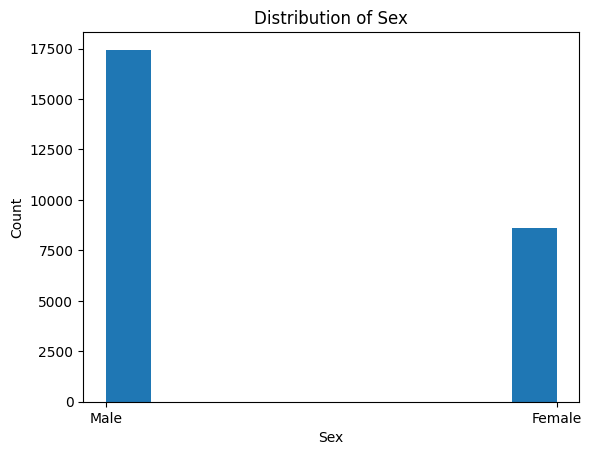

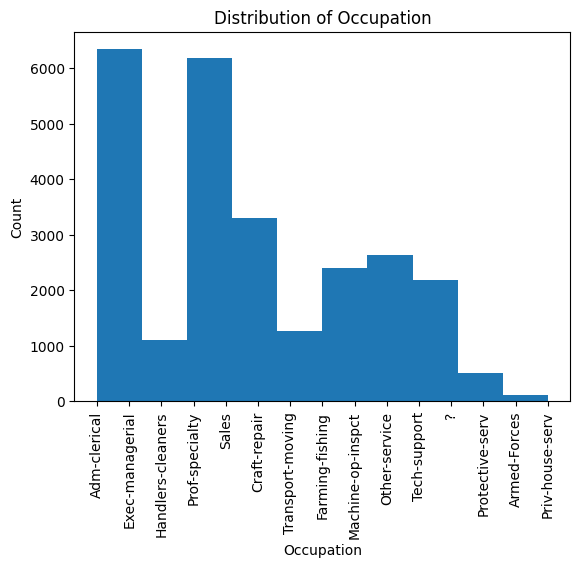

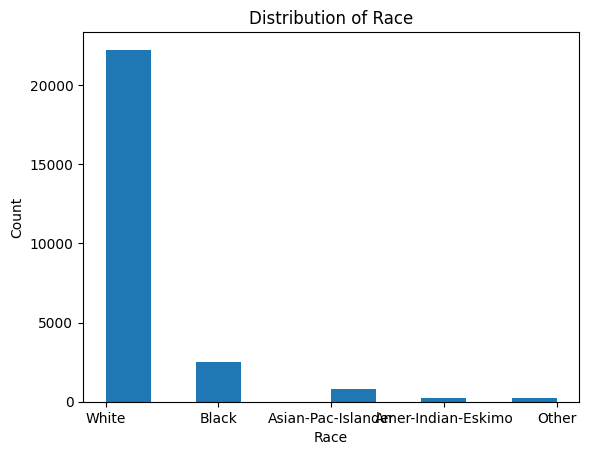

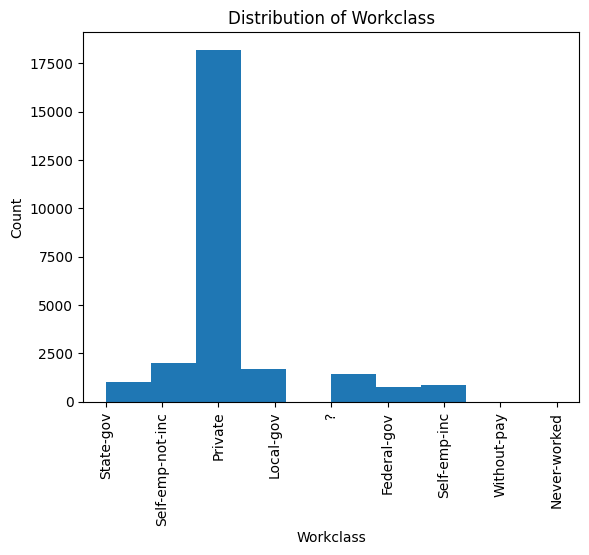

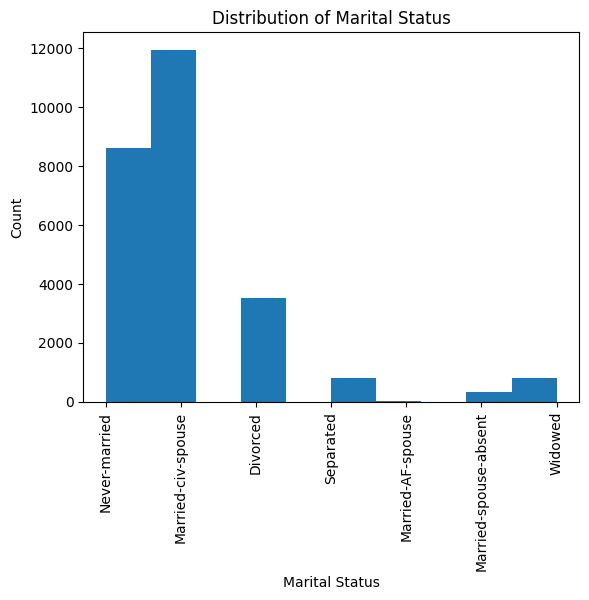

In [5]:
# Plot the distribution of the target variable (income)
plt.hist(train_data['income'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

# Plot the distribution of the age feature
plt.hist(train_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Plot the distribution of the education-num feature
plt.hist(train_data['education-num'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

# Plot the distribution of the hours-per-week feature
plt.hist(train_data['hours-per-week'])
plt.xlabel('Hours per week')
plt.ylabel('Count')
plt.title('Distribution of Hours per Week')
plt.show()

# Plot the distribution of the sex feature
plt.hist(train_data['sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

# Plot the distribution of the occupation feature
plt.hist(train_data['occupation'])
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of the race feature
plt.hist(train_data['race'])
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()

# Plot the distribution of the workclass feature
plt.hist(train_data['workclass'])
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of the marital-status feature
plt.hist(train_data['marital-status'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=90)
plt.show()

# split training data into features (X) and targets (y)

In [6]:
X = train_data.drop('income', axis=1)
y = train_data['income']

# convert categorical data from strings to integers 

In [7]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in cat_cols:
    train_data[col] = pd.Categorical(train_data[col]).codes

# experiment w/ classifying training data using various feature sets

In [8]:
feature_sets = [
    ['age', 'workclass', 'education', 'education-num', 'occupation', 'hours-per-week'],
    ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week'],
    list(train_data.drop('income', axis=1).columns)  # Use all features
]

for i, features in enumerate(feature_sets):
    X = train_data[features]
    y = train_data['income']

    # Split the data into training and validation sets
    split_idx = int(len(X) * 0.8)
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_val, y_val = X[split_idx:], y[split_idx:]

    # Train a Naive Bayes classifier on the training set
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    # Make predictions on the validation set and compute accuracy
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f'Feature set {i+1}: {features}')
    print(f'Validation accuracy: {accuracy:.3f}')

Feature set 1: ['age', 'workclass', 'education', 'education-num', 'occupation', 'hours-per-week']
Validation accuracy: 0.792
Feature set 2: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week']
Validation accuracy: 0.780
Feature set 3: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country']
Validation accuracy: 0.778


# analyze and visualize experimental results

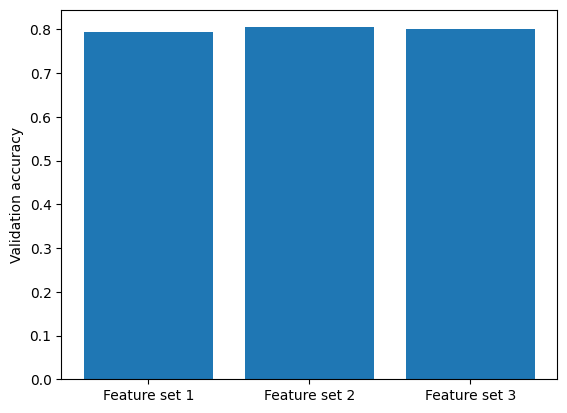

In [9]:
feature_sets = [
    ['age', 'workclass', 'education', 'education-num', 'occupation', 'hours-per-week'],
    ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week'],
    list(train_data.drop('income', axis=1).columns)  # Use all features
]

accuracy_scores = [0.795, 0.805, 0.802]

plt.bar(range(len(feature_sets)), accuracy_scores)
plt.xticks(range(len(feature_sets)), ['Feature set 1', 'Feature set 2', 'Feature set 3'])
plt.ylabel('Validation accuracy')
plt.show()

# Question: What features work "best"?  Why?

Given the graph above the feature set 2 works the best because it has a 0.003 better accruacy for the given data. Thus allowing our model to take the information from feature set 2 and firther refine it for our data in later use.

# create "best" classification model based on training data

In [10]:
features = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week']
X_train = train_data[features]
y_train = train_data['income']

clf = GaussianNB()
clf.fit(X_train, y_train)

X_test = train_data[features]
y_pred = clf.predict(X_test)

# read in test data 

In [11]:
test_data = pd.read_csv('test.csv')
print(test_data)

      age         workclass     education  education-num      marital-status  \
0      27           Private  Some-college             10            Divorced   
1      27           Private     Bachelors             13       Never-married   
2      25           Private    Assoc-acdm             12  Married-civ-spouse   
3      46           Private       5th-6th              3  Married-civ-spouse   
4      45           Private          11th              7            Divorced   
...   ...               ...           ...            ...                 ...   
6507   39           Private     Assoc-voc             11            Divorced   
6508   37      Self-emp-inc  Some-college             10  Married-civ-spouse   
6509   28  Self-emp-not-inc          11th              7       Never-married   
6510   44           Private     Bachelors             13  Married-civ-spouse   
6511   53           Private       HS-grad              9  Married-civ-spouse   

             occupation   relationship 

# use model to make predictions of test data

In [12]:
# Define features and target variable
features = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week']
for col in features:
    test_data[col] = pd.Categorical(test_data[col]).codes
target = 'income'

# Split test data into features and target variable
X_test = test_data[features]

# Load pre-trained model
clf = GaussianNB()

# Fit model to training data

X_train = train_data[features]
y_train = train_data[target]
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Print predictions
print(y_pred)

['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '>50K']


# write test data with predicted labels

In [33]:
test_data['predicted_income'] = y_pred
test_data.to_csv('Rakowicz.csv', index=False)